[warning](https://www.oxfordlearnersdictionaries.com/definition/english/warning_1): [countable, uncountable] a statement, an event, etc. telling somebody that something bad or unpleasant may happen in the future so that they can try to avoid it

[suggestion](https://www.oxfordlearnersdictionaries.com/definition/english/suggestion): [countable] an idea or a plan that you mention for somebody else to think about

# 1️⃣Introduction  

There are content and communication message differences across various Twitter accounts of cyber police just like this [tweet](https://twitter.com/aqfiazfan/status/1363062205927682050) said

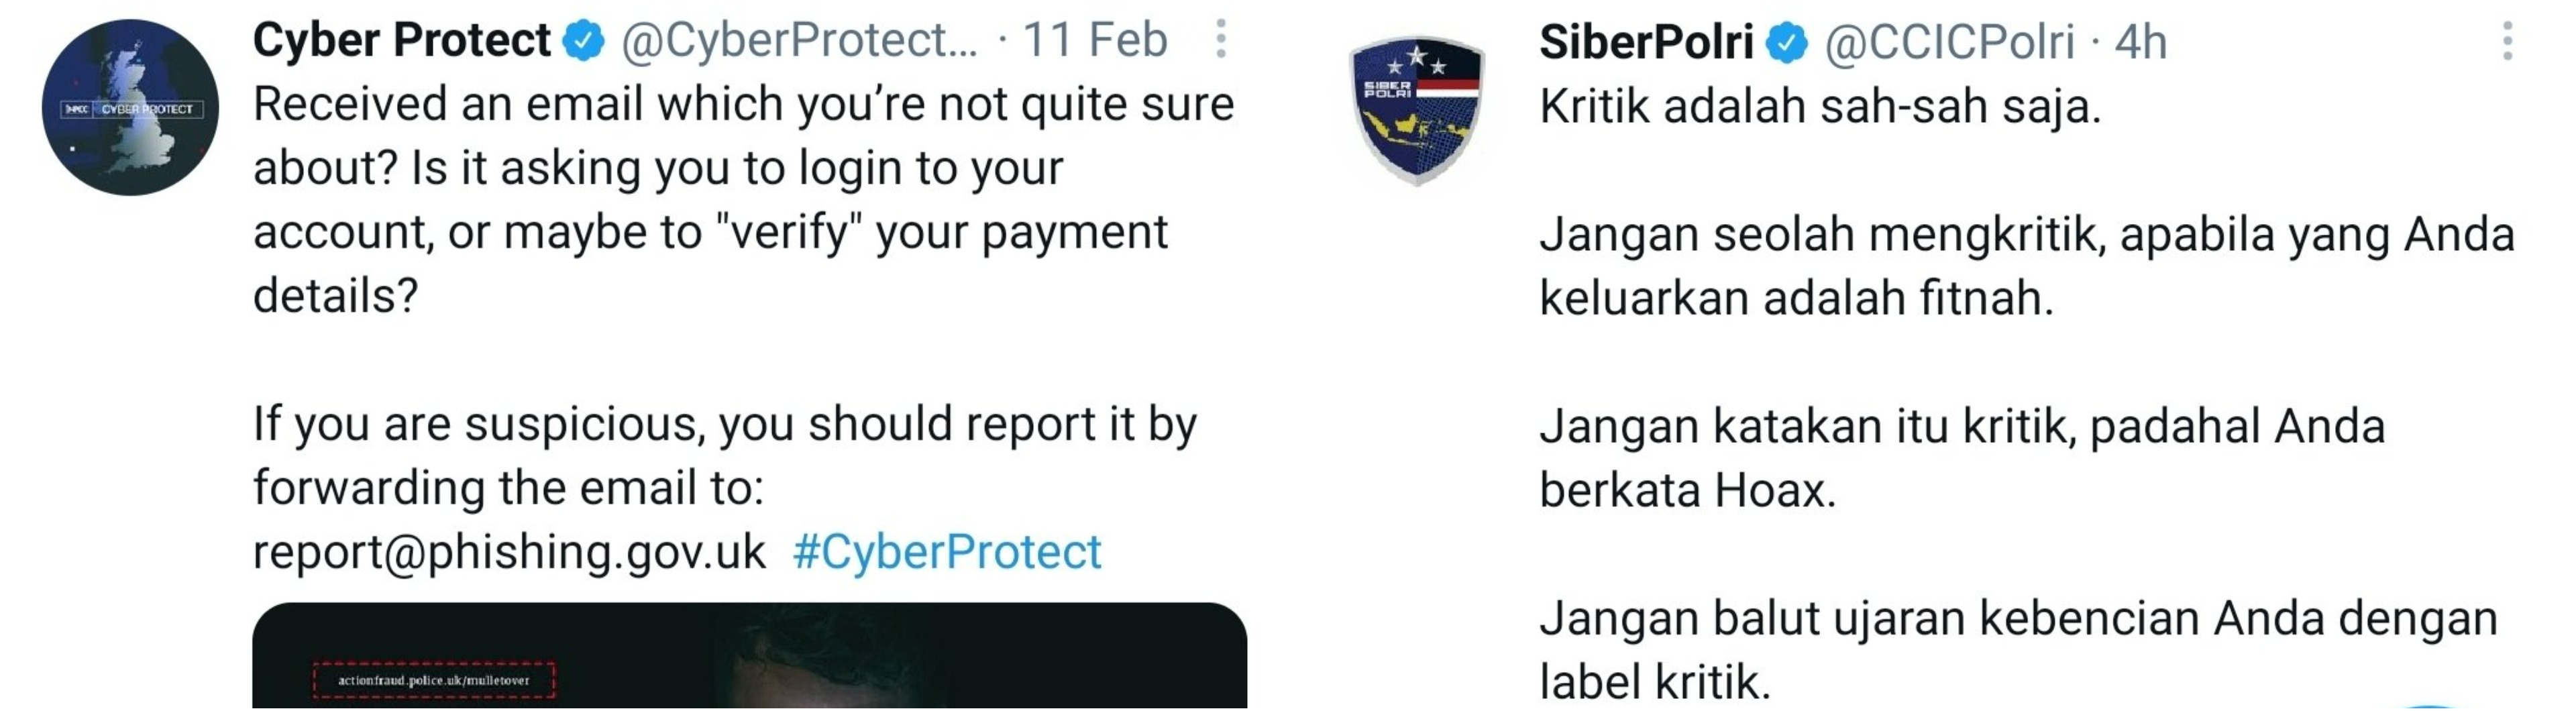

Purpose:  
To compare online activities, content and communication messages across various Twitter verified ✅ accounts of cyber police

Those cyber police accounts are as follows:

| Account | Country |
|---|---|
| [SiberPolri](https://twitter.com/CCICPolri) | Indonesia |
| [U.S. Cyber Command](https://twitter.com/US_CYBERCOM) | USA |
| [Cyber Protect](https://twitter.com/CyberProtectUK) | UK |
| [Australian Cyber Security Centre](https://twitter.com/CyberGovAU) | Australia |
| [Canadian Centre for Cyber Security](https://twitter.com/cybercentre_ca) | Canada |
| [INTERPOL_Cyber](https://twitter.com/INTERPOL_Cyber) | Interpol |

Those are accounts that I could find at the moment (last checked on 13 October 2021) and does not rule out the possibility that there are still other Twitter verified accounts of cyber police out there

# 2️⃣Scraping Tweets

Twitter data scraping using tool like [Tweepy](https://www.tweepy.org/) (one of <strong>Open Source INTelligence/OSINT</strong>) and [Twitter API v2](https://developer.twitter.com/en/docs/twitter-api)

Heavily inspired by [1](https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9)
and
[2](https://medium.com/@emichaelbernardo/using-tweepy-and-the-twitter-api-v2-be5903b84bf6)

## Installation

In [9]:
%pip install tweepy

Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [1]:
import configparser
import tweepy as tw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from typing import Tuple, Dict

# xkcd-styled & humor sans font installed to give semi-sarcasm graph
plt.xkcd()
%matplotlib inline

CONFIG = 'config.ini'

## Twitter API connection

In [2]:
# login to twitter dev account
config = configparser.ConfigParser(interpolation=None) # to escape % and etc
config.read(CONFIG)

bearer_token = config['twitter']['bearer_token']
# consumer_key = config['twitter']['consumer_key']
# consumer_secret = config['twitter']['consumer_secret']
# access_token = config['twitter']['access_token']
# access_token_secret = config['twitter']['access_token_secret']

# authenticate
client = tw.Client(bearer_token=bearer_token)

## Getting IDs

In [3]:
# since the most tweet account is less than 7k at the time writing this code
LIMIT = 7000

In [4]:
countries = (
    'Indonesia',
    'USA',
    'Great Britain',
    'Australia',
    'Canada',
    'Interpol'
)
usernames = [
    'CCICPolri',
    'US_CYBERCOM',
    'CyberProtectUK',
    'CyberGovAU',
    'cybercentre_ca',
    'INTERPOL_Cyber'
]

unames_dict = {c:u for u, c in zip(usernames, countries)}
unames_dict.items()

dict_items([('Indonesia', 'CCICPolri'), ('USA', 'US_CYBERCOM'), ('Great Britain', 'CyberProtectUK'), ('Australia', 'CyberGovAU'), ('Canada', 'cybercentre_ca'), ('Interpol', 'INTERPOL_Cyber')])

In [5]:
ids = client.get_users(usernames=usernames)
id_dict = {c:id.id for id, c in zip(ids.data, countries)}
id_dict.items()

dict_items([('Indonesia', 735358344106549248), ('USA', 1130893345075716096), ('Great Britain', 869529855825674240), ('Australia', 836716681179213824), ('Canada', 974706984007225344), ('Interpol', 392714686)])

# 3️⃣Cyber Police Account's Tweet (exclude RTs & Replies)

## Getting Accounts Tweets

! masalah menggunakan paginator dan tidak (cek limit received tweet)

link to the OG tweet -> twitter/x/status/tweet_ID

[twitter.com/x/status/1617734750772563969](https://twitter.com/x/status/1617734750772563969)

[tweepy get_users_tweets](https://docs.tweepy.org/en/stable/client.html#tweepy.Client.get_users_tweets) |
[twitter api v2](https://developer.twitter.com/en/docs/twitter-api/tweets/timelines/api-reference/get-users-id-tweets)

By default, the most recent ten Tweets are returned per request. Using pagination, the most recent 3,200 Tweets can be retrieved.

App rate limit (Application-only): 1500 requests per 15-minute window shared among all users of your app

User rate limit (User context): 900 requests per 15-minute window per each authenticated user



✅ 4 Getting more than 100 Tweets at a time using paginator  
6 Getting Tweets with user information, for each Tweet  
✅ 10 user timeline  
✅ 11 user's mention  
15 Getting users that retweeted a Tweet  
16 Getting Tweets that a user liked  

In [6]:
def get_account_tweets(country: str) -> pd.DataFrame:
    data, ids, rts, likes, replies, created_at, account = [], [], [], [], [], [], []
    for tweet in tqdm(tw.Paginator( 
                                client.get_users_tweets,
                                id=id_dict[country],
                                exclude=['retweets','replies'],
                                max_results=100,
                                tweet_fields=['public_metrics','created_at'],
                                ).flatten(limit=LIMIT)):
        data.append(tweet.text)
        ids.append(tweet.id)
        rts.append(tweet.public_metrics['retweet_count']
                    + tweet.public_metrics['quote_count'])
        likes.append(tweet.public_metrics['like_count'])
        replies.append(tweet.public_metrics['reply_count'])
        created_at.append(tweet.created_at)
        account.append(country)
    res = pd.DataFrame(
        {
            'text': data,
            'id': ids,
            'rt': rts,
            'like': likes,
            'reply': replies,
            'created_at': created_at,
            'account': account
        }
    )
    return res

In [7]:
id_t = get_account_tweets('Indonesia')
us_t = get_account_tweets('USA')
gb_t = get_account_tweets('Great Britain')
au_t = get_account_tweets('Australia')
ca_t = get_account_tweets('Canada')
int_t = get_account_tweets('Interpol')

display(id_t)
display(us_t)
display(gb_t)
display(au_t)
display(ca_t)
display(int_t)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [ ]:
# 1 table for each account for tweets
# 1 table for each account for mentions tweets
# 1 table for each account for liked tweets
for tweet in tw.Paginator(client.get_liked_tweets,
                          id=id_dict['🇮🇩'],
                        #   exclude=['retweets', 'replies'],
                        #   end_time='2022-06-23T00:00:00Z',
                          max_results=5,
                          tweet_fields=['created_at'],
                          ).flatten(limit=6000):
    print('data:', tweet.text) 
    print('id:', tweet.id)
    # print('RTs:', tweet.public_metrics['retweet_count']
    #         + tweet.public_metrics['quote_count'])
    # print('Likes:', tweet.public_metrics['like_count'])
    # print('Replies:', tweet.public_metrics['reply_count'])
    print('created_at:', tweet.created_at)

NameError: name 'get_liked_tweets' is not defined

In [ ]:
# 1 table for each account for tweets
# 1 table for each account for mentions tweets
# 1 table for each account for liked tweets
for tweet in tw.Paginator(client.get_users_tweets,
                          id=id_dict['🇮🇩'],
                          exclude=['retweets', 'replies'],
                        #   end_time='2022-06-23T00:00:00Z',
                          max_results=100,
                          tweet_fields=['public_metrics', 'created_at'],
                          ).flatten(limit=6000):
    print('data:', tweet.text)
    print('RTs:', tweet.public_metrics['retweet_count']
            + tweet.public_metrics['quote_count'])
    print('Likes:', tweet.public_metrics['like_count'])
    print('Replies:', tweet.public_metrics['reply_count'])
    print('created_at:', tweet.created_at)

[<Tweet id=1541278677618819072 text='Lemes banget ngajar pagi masih loyou'>, <Tweet id=1541120300020285440 text='Mendekati 30 tahun https://t.co/ba0GxA6nXy'>, <Tweet id=1541079767776395264 text='Pengen jadi serpihan debu terus ketiup angin'>, <Tweet id=1541079637245435904 text='Bocil naik ini sy yang pusing https://t.co/Bs34IyOzAr'>, <Tweet id=1540960035618304000 text='Mau kepala 3 adLah umur mulai mengelola aset aset keluarga\n.\nYa mengelola aset sama kaya lari marathon dengan garis finish pada saat maut menjemput'>, <Tweet id=1540946692383850497 text='Good https://t.co/i780ia6nwD'>, <Tweet id=1540931227611713541 text='Mental nyalahin rakyatnya ga jauh beda la https://t.co/pGQSHSQcRH'>, <Tweet id=1540911596427694080 text='Betul https://t.co/O1lg9Y6qiA'>, <Tweet id=1540763532094242816 text='Dari sini saya paham kenapa butuh fpi buat kasus kasus beginian https://t.co/UIi0KV8zMF'>, <Tweet id=1540763212932878336 text='Ini alasan maksain nikah karena pacaran buang waktu energi dn biaya ta

## Retweets over time

## Likes over time

## Replies over time

## 1-Gram

## 2-Gram

## 3-Gram

# 4️⃣Tweet that Mentions Cyber Police Account

## Getting Tweets

In [8]:
def get_account_mentioned_tweets(country: str) -> pd.DataFrame:
    data, ids, created_at, account = [], [], [], []
    for tweet in tqdm(tw.Paginator(
                                client.get_users_mentions,
                                id=id_dict[country],
                                max_results=100,
                                tweet_fields=['created_at']
                                ).flatten(limit=LIMIT)):
        data.append(tweet.text)
        ids.append(tweet.id)
        created_at.append(tweet.created_at)
        account.append(country)
    res = pd.DataFrame(
        {
            'text': data,
            'id': ids,
            'created_at': created_at,
            'account': account
        }
    )
    return res

In [9]:
mentioned_id_t = get_account_mentioned_tweets('Indonesia')
mentioned_us_t = get_account_mentioned_tweets('USA')
mentioned_gb_t = get_account_mentioned_tweets('Great Britain')
mentioned_au_t = get_account_mentioned_tweets('Australia')
mentioned_ca_t = get_account_mentioned_tweets('Canada')
mentioned_int_t = get_account_mentioned_tweets('Interpol')

display(mentioned_id_t)
display(mentioned_us_t)
display(mentioned_gb_t)
display(mentioned_au_t)
display(mentioned_ca_t)
display(mentioned_int_t)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,text,id,created_at,account
0,@mohmahfudmd @cantonabayuaji5 @KabarMenakerRI ...,1618547391694802949,2023-01-26 09:52:23+00:00,Indonesia
1,Penipuan Lowongan Kerja @CCICPolri @aduankonte...,1618546927783772161,2023-01-26 09:50:33+00:00,Indonesia
2,kereennnnnn....semoga bisa diterusin nangkepin...,1618544499248222208,2023-01-26 09:40:54+00:00,Indonesia
3,"@Mdy_Asmara1701 Tinggal dilaporkan kok ""main d...",1618541278152765445,2023-01-26 09:28:06+00:00,Indonesia
4,@puspita3_eka @DivHumas_Polri @CCICPolri @List...,1618540904796786691,2023-01-26 09:26:37+00:00,Indonesia
...,...,...,...,...
839,@nusantara_one @KPK_RI @DivHumas_Polri @CCICPo...,1617068218635653122,2023-01-22 07:54:41+00:00,Indonesia
840,@nusantara_one @KPK_RI @DivHumas_Polri @CCICPo...,1617067685527064576,2023-01-22 07:52:34+00:00,Indonesia
841,@Tommyesa78 @DivHumas_Polri @CCICPolri @Listyo...,1617065622135009280,2023-01-22 07:44:22+00:00,Indonesia
842,@CCICPolri Mantap ... 👍👍🙏 ... \nWalaupun Belia...,1617064592341078020,2023-01-22 07:40:17+00:00,Indonesia


,text,id,created_at,account
0,https://t.co/DU0svLK3Dq oh so they are trying ...,1618531566334148608,2023-01-26 08:49:30+00:00,USA
1,https://t.co/uJntNyXTp1 @NC_Governor @JoshStei...,1618527859576016897,2023-01-26 08:34:47+00:00,USA
2,https://t.co/OP3kB0W9TW falsifying my informat...,1618514286636302341,2023-01-26 07:40:51+00:00,USA
3,https://t.co/Oj0OxaoiHd Health care fraud in f...,1618510713777192961,2023-01-26 07:26:39+00:00,USA
4,https://t.co/sGrduKIM1s I know a few embezzlin...,1618510409983741952,2023-01-26 07:25:26+00:00,USA
...,...,...,...,...
839,@GoogleJesusJes1 @CENTCOM @FBI @TheJusticeDept...,1613985499705708562,2023-01-13 19:45:04+00:00,USA
840,@GoogleJesusJes1 @CENTCOM @FBI @TheJusticeDept...,1613983105773076480,2023-01-13 19:35:33+00:00,USA
841,How does #Daesh organize online? Take a look ...,1613980496358264833,2023-01-13 19:25:11+00:00,USA
842,@GoogleJesusJes1 @CENTCOM @FBI @TheJusticeDept...,1613978072742780929,2023-01-13 19:15:33+00:00,USA


,text,id,created_at,account
0,@actionfrauduk @CyberProtectUK @NCSC I contact...,1618241641307070464,2023-01-25 13:37:27+00:00,Great Britain
1,@actionfrauduk @CyberProtectUK @NCSC My intera...,1618241554594037760,2023-01-25 13:37:06+00:00,Great Britain
2,Did you know what Phishing is? Here are the st...,1618173189569536000,2023-01-25 09:05:27+00:00,Great Britain
3,@actionfrauduk @CyberProtectUK @NCSC Thanks. I...,1617579513667551232,2023-01-23 17:46:23+00:00,Great Britain
4,@AngelaPowerDis1 @CyberProtectUK @NCSC @Angela...,1617536112947249155,2023-01-23 14:53:56+00:00,Great Britain
...,...,...,...,...
625,@PostOffice @CyberProtectUK Thank you very muc...,1410996949197676544,2021-07-02 16:21:02+00:00,Great Britain
626,"@shahin_lisa @CyberProtectUK Hi Lisa, yes this...",1410996778577666056,2021-07-02 16:20:21+00:00,Great Britain
627,@PostOffice @CyberProtectUK Is this a scam one...,1410996055441821705,2021-07-02 16:17:29+00:00,Great Britain
628,I got scammed by the company @RealtegicR . I h...,1410964271069028358,2021-07-02 14:11:11+00:00,Great Britain


,text,id,created_at,account
0,@theage @AustralianOpen @atptour @WTA @CyberGo...,1618353078985699329,2023-01-25 21:00:16+00:00,Australia
1,@vanyusha2022 @ukrtennis_eng Прихожанин сербсь...,1618349242078330882,2023-01-25 20:45:01+00:00,Australia
2,It's never too early to learn how to stay secu...,1618280203746410499,2023-01-25 16:10:41+00:00,Australia
3,It's never too early to learn how to stay secu...,1618261078265454596,2023-01-25 14:54:41+00:00,Australia
4,It's never too early to learn how to stay secu...,1618157970667470850,2023-01-25 08:04:58+00:00,Australia
...,...,...,...,...
812,The latest Blue Ocean Web Hosting NEWS! https:...,1585852562959474688,2022-10-28 04:34:49+00:00,Australia
813,@CyberGovAU But if they leak the exfiltrated G...,1585826374929223680,2022-10-28 02:50:45+00:00,Australia
814,📌 Bookmark this post just in case. If you ever...,1585825553734463488,2022-10-28 02:47:29+00:00,Australia
815,@CyberGovAU,1585823205738319872,2022-10-28 02:38:10+00:00,Australia


,text,id,created_at,account
0,https://t.co/Ljd04udhj1 @cybercentre_ca #juggi...,1618502418341457922,2023-01-26 06:53:41+00:00,Canada
1,https://t.co/wr0rE4jWmb #missingpersons @cybe...,1618468077678776321,2023-01-26 04:37:14+00:00,Canada
2,@cybercentre_ca What about all the misinformat...,1618442537039167489,2023-01-26 02:55:44+00:00,Canada
3,@cybercentre_ca Who’s gets to define “wrong di...,1618428131370766336,2023-01-26 01:58:30+00:00,Canada
4,@TD_Canada @FCACan @NCA_UK @cybercentre_ca rem...,1618405188892778496,2023-01-26 00:27:20+00:00,Canada
...,...,...,...,...
772,https://t.co/ubydqsn0FT\n@JustinTrudeau @USDIS...,1560032314213670914,2022-08-17 22:34:22+00:00,Canada
773,https://t.co/0HWyEROSag\n@JustinTrudeau @USDIS...,1559999404022587394,2022-08-17 20:23:35+00:00,Canada
774,https://t.co/rB2eW9dxkN\n@JustinTrudeau @USDIS...,1559976848645410822,2022-08-17 18:53:58+00:00,Canada
775,Our Canadian Centre for Cyber Security provide...,1559972131693363203,2022-08-17 18:35:13+00:00,Canada


,text,id,created_at,account
0,@Newsweek @RollingStone @BuzzFeed @ellievhall ...,1618543769720324097,2023-01-26 09:38:00+00:00,Interpol
1,@INTERPOL_Cyber \nAkshay Suresh from south Ban...,1618525734712250369,2023-01-26 08:26:20+00:00,Interpol
2,@Musa___Khawula @TwitterSupport @SAPoliceServi...,1618514642657218560,2023-01-26 07:42:16+00:00,Interpol
3,@MosesAbubakar6 @TariqRamadan @Senat @francois...,1618513674012069889,2023-01-26 07:38:25+00:00,Interpol
4,@INTERPOL_HQ @INTERPOL_HQ @INTERPOL_Cyber @INT...,1618502409512419329,2023-01-26 06:53:39+00:00,Interpol
...,...,...,...,...
818,@ZaraMucci @mohelien @cbdiallo_10 @CheikhGhazo...,1613850940414492674,2023-01-13 10:50:22+00:00,Interpol
819,@MosesAbubakar6 @TariqRamadan @Senat @francois...,1613842651693867010,2023-01-13 10:17:26+00:00,Interpol
820,@marie41181089 @ThinknBE @LiaBzn @DamienRieu @...,1613830685394870273,2023-01-13 09:29:53+00:00,Interpol
821,@ZaraMucci @ThinknBE @LiaBzn @DamienRieu @unis...,1613828928723902465,2023-01-13 09:22:54+00:00,Interpol


In [ ]:
# 1 table for each account for tweets
# 1 table for each account for mentions tweets
# 1 table for each account for liked tweets
for tweet in tw.Paginator(client.get_users_mentions,
                          id=id_dict['Indonesia'],
                        #   exclude=['retweets', 'replies'],
                        #   end_time='2022-06-23T00:00:00Z',
                          max_results=5,
                          tweet_fields=['created_at'],
                          ).flatten(limit=10):
    print('data:', tweet.text)
    print('id:', tweet.id)
    # print('RTs:', tweet.public_metrics['retweet_count']
    #         + tweet.public_metrics['quote_count'])
    # print('Likes:', tweet.public_metrics['like_count'])
    # print('Replies:', tweet.public_metrics['reply_count'])
    print('created_at:', tweet.created_at)

data: @zarnaout45 @CCICPolri cek dong pak..apa benar pak @jokowi pernah bilang begitu?
id: 1617895988357894144
created_at: 2023-01-24 14:43:57+00:00
data: @MCAOps Apakah sebar hoax sekarang legal? @kemkominfo @CCICPolri 

Apa memang sengaja dipiara? Atau memang akun piaraan! Jadi bebas2 aja!
id: 1617894241883283457
created_at: 2023-01-24 14:37:00+00:00
data: @HJ_Boy_ @caul_tanjung @CCICPolri @DivHumas_Polri @ListyoSigitP @mohmahfudmd @jokowi Setiap org yg menggunakan ijazah, sertifikat kompetensi, gelar akademik, profesi, dan/atau vokasi yg terbukti palsu dipidana dgn pidana penjara paling lama 5 tahun &amp; atau pidana denda paling byk Rp500.000.000 (lima ratus juta rupiah,” tulis UU No. 20 tahun 2003 Pasal 69 ayat 1.
id: 1617885061512323077
created_at: 2023-01-24 14:00:32+00:00
data: @SanggarKutipan @kemkominfo @BSSN_RI @CCICPolri @pertamina Nah kan
id: 1617884410053021696
created_at: 2023-01-24 13:57:56+00:00
data: @kumparan @DivHumas_Polri @ListyoSigitP @CCICPolri @ListyoSigitP
id:

## 1-Gram

## 2-Gram

## 3-Gram

## Geolocation distribution

# 5️⃣Tweet Which Cyber Police Account Likes

## 1-Gram

## 2-Gram

## 3-Gram

## Geolocation distribution

## Liked Frequency over time

# 6️⃣Tweet Which Cyber Police Account Retweets

# 7️⃣Tweet Which Cyber Police Account Replies to

# 8️⃣Cyber Police Account Online Activities

# 9️⃣Future Work

another portfolio : sentimen analisis

kasus indonesia:

- korelasi sentimen balasan tweet ke akun polisi siber dengan sentimen tweet akun polisi siber

- korelasi sentimen tweet akun polisi siber dengan jumlah berita keamanan siber

- korelasi sentimen balasan tweet ke akun polisi siber dengan jumlah berita keamanan siber